In [121]:
# R markdown
#Import library
library(ggplot2)
library(scales)
library(grid)
library(RColorBrewer)
library(corrplot)
library(alluvial)
library(dplyr)
library(readr)
library(data.table)
library(tibble)
library(tidyr)
library(stringr)
library(forcats)
library(lubridate)
library(geosphere) #map
library(leaflet) #map
library(leaflet.extras) #map
library(maps)
library(xgboost)
library(caret)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘readr’

The following objects are masked from ‘package:scales’:

    col_factor, col_numeric

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date

Loading required package: sp

Attaching package: ‘xgboost’

The following object is masked from ‘packa

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected ')'
1: help())
          ^


# load data

In [102]:
train <- (fread('train.csv'))
test <- (fread('test.csv'))

Read 1458644 rows and 11 (of 11) columns from 0.187 GB file in 00:00:07
Read 625134 rows and 9 (of 9) columns from 0.066 GB file in 00:00:03


In [34]:
summary(train)

      id              vendor_id     pickup_datetime    dropoff_datetime  
 Length:1458644     Min.   :1.000   Length:1458644     Length:1458644    
 Class :character   1st Qu.:1.000   Class :character   Class :character  
 Mode  :character   Median :2.000   Mode  :character   Mode  :character  
                    Mean   :1.535                                        
                    3rd Qu.:2.000                                        
                    Max.   :2.000                                        
 passenger_count pickup_longitude  pickup_latitude dropoff_longitude
 Min.   :0.000   Min.   :-121.93   Min.   :34.36   Min.   :-121.93  
 1st Qu.:1.000   1st Qu.: -73.99   1st Qu.:40.74   1st Qu.: -73.99  
 Median :1.000   Median : -73.98   Median :40.75   Median : -73.98  
 Mean   :1.665   Mean   : -73.97   Mean   :40.75   Mean   : -73.97  
 3rd Qu.:2.000   3rd Qu.: -73.97   3rd Qu.:40.77   3rd Qu.: -73.96  
 Max.   :9.000   Max.   : -61.34   Max.   :51.88   Max.   : -61.34  

In [38]:
glimpse(train)

Observations: 1,458,644
Variables: 11
$ id                 <chr> "id2875421", "id2377394", "id3858529", "id350467...
$ vendor_id          <int> 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, ...
$ pickup_datetime    <chr> "2016-03-14 17:24:55", "2016-06-12 00:43:35", "2...
$ dropoff_datetime   <chr> "2016-03-14 17:32:30", "2016-06-12 00:54:38", "2...
$ passenger_count    <int> 1, 1, 1, 1, 1, 6, 4, 1, 1, 1, 1, 4, 2, 1, 1, 1, ...
$ pickup_longitude   <dbl> -73.98215, -73.98042, -73.97903, -74.01004, -73....
$ pickup_latitude    <dbl> 40.76794, 40.73856, 40.76394, 40.71997, 40.79321...
$ dropoff_longitude  <dbl> -73.96463, -73.99948, -74.00533, -74.01227, -73....
$ dropoff_latitude   <dbl> 40.76560, 40.73115, 40.71009, 40.70672, 40.78252...
$ store_and_fwd_flag <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"...
$ trip_duration      <int> 455, 663, 2124, 429, 435, 443, 341, 1551, 255, 1...


In [38]:
summary(test)

      id              vendor_id     pickup_datetime    passenger_count
 Length:625134      Min.   :1.000   Length:625134      Min.   :0.000  
 Class :character   1st Qu.:1.000   Class :character   1st Qu.:1.000  
 Mode  :character   Median :2.000   Mode  :character   Median :1.000  
                    Mean   :1.535                      Mean   :1.662  
                    3rd Qu.:2.000                      3rd Qu.:2.000  
                    Max.   :2.000                      Max.   :9.000  
 pickup_longitude  pickup_latitude dropoff_longitude dropoff_latitude
 Min.   :-121.93   Min.   :37.39   Min.   :-121.93   Min.   :36.60   
 1st Qu.: -73.99   1st Qu.:40.74   1st Qu.: -73.99   1st Qu.:40.74   
 Median : -73.98   Median :40.75   Median : -73.98   Median :40.75   
 Mean   : -73.97   Mean   :40.75   Mean   : -73.97   Mean   :40.75   
 3rd Qu.: -73.97   3rd Qu.:40.77   3rd Qu.: -73.96   3rd Qu.:40.77   
 Max.   : -69.25   Max.   :42.81   Max.   : -67.50   Max.   :48.86   
 store_and_fw

In [40]:
str(test)

Classes ‘data.table’ and 'data.frame':	625134 obs. of  9 variables:
 $ id                : chr  "id3004672" "id3505355" "id1217141" "id2150126" ...
 $ vendor_id         : int  1 1 1 2 1 1 1 1 2 2 ...
 $ pickup_datetime   : chr  "2016-06-30 23:59:58" "2016-06-30 23:59:53" "2016-06-30 23:59:47" "2016-06-30 23:59:41" ...
 $ passenger_count   : int  1 1 1 1 1 1 1 2 2 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.7 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.7 40.7 40.8 ...
 $ store_and_fwd_flag: chr  "N" "N" "N" "N" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [45]:
#Missing values
colSums(is.na(train))

id          vendor_id    pickup_datetime   dropoff_datetime 
                 0                  0                  0                  0 
   passenger_count   pickup_longitude    pickup_latitude  dropoff_longitude 
                 0                  0                  0                  0 
  dropoff_latitude store_and_fwd_flag      trip_duration 
                 0                  0                  0

In [45]:
colSums(is.na(test))

id          vendor_id    pickup_datetime    passenger_count 
                 0                  0                  0                  0 
  pickup_longitude    pickup_latitude  dropoff_longitude   dropoff_latitude 
                 0                  0                  0                  0 
store_and_fwd_flag 
                 0

# Combining train and test dataset

In [155]:
combine <-bind_rows(train %>% mutate(dset='train'),
                               test %>% mutate(dset='test',drop0ff_datetime = NA,
                                              trip_duration=NA))
combine <- combine %>% mutate(dset=factor(dset))


# Reformating features

In [103]:
train <- train %>%
    mutate(pickup_datetime = ymd_hms(pickup_datetime),
           dropoff_datetime = ymd_hms(dropoff_datetime),        
           vendor_id=factor(vendor_id),
           passenger_count = factor(passenger_count),
           store_and_fwd_flag=factor(store_and_fwd_flag))


In [105]:
str(train)

Classes ‘data.table’ and 'data.frame':	1458644 obs. of  11 variables:
 $ id                : chr  "id2875421" "id2377394" "id3858529" "id3504673" ...
 $ vendor_id         : int  2 1 2 2 2 2 1 2 1 2 ...
 $ pickup_datetime   : chr  "2016-03-14 17:24:55" "2016-06-12 00:43:35" "2016-01-19 11:35:24" "2016-04-06 19:32:31" ...
 $ dropoff_datetime  : chr  "2016-03-14 17:32:30" "2016-06-12 00:54:38" "2016-01-19 12:10:48" "2016-04-06 19:39:40" ...
 $ passenger_count   : int  1 1 1 1 1 6 4 1 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.8 40.7 40.8 40.7 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.7 40.7 40.8 ...
 $ store_and_fwd_flag: chr  "N" "N" "N" "N" ...
 $ trip_duration     : int  455 663 2124 429 435 443 341 1551 255 1225 ...
 - attr(*, ".internal.selfref")=<externalptr> 


consistency check

In [73]:
train%>%
    mutate(check = abs(int_length(interval(dropoff_datetime,pickup_datetime))+trip_duration)>0)%>%
    select(check,dropoff_datetime,pickup_datetime,trip_duration)%>%
    group_by(check)%>%
    count()


check,n
FALSE,1458644


In [4]:
# Define multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [158]:
set.seed(1234)
foo <- sample_n(train, 8e3)

leaflet(data = foo) %>% addProviderTiles("Esri.NatGeoWorldMap") %>%
  addCircleMarkers(~ pickup_longitude, ~pickup_latitude, radius = 1,
                   color = "blue", fillOpacity = 0.3)

HTML widgets cannot be represented in plain text (need html)

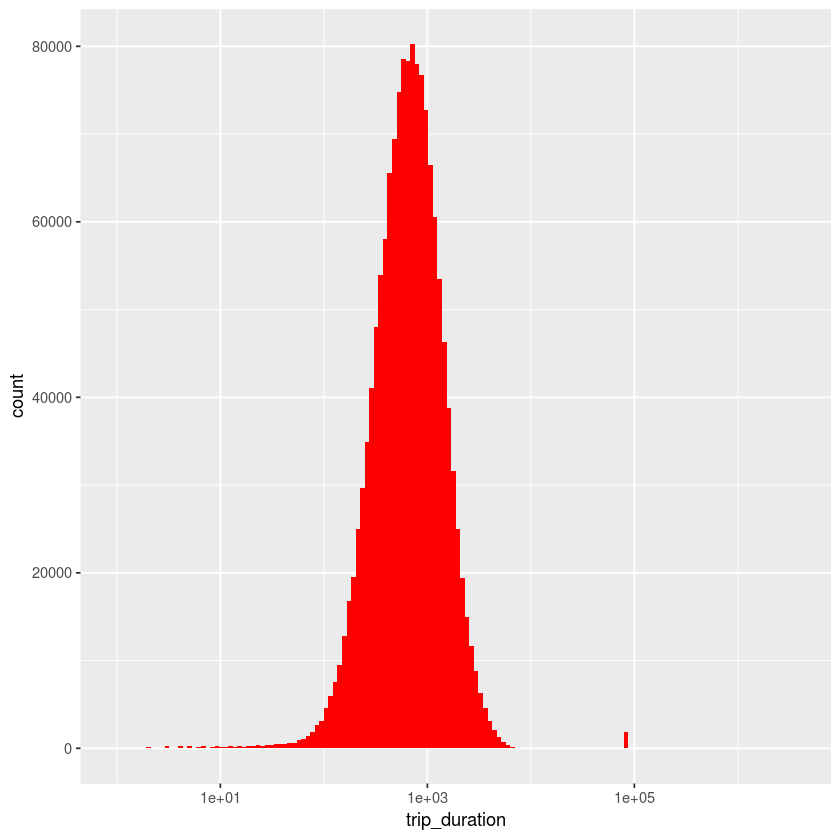

In [91]:
train%>%
    ggplot(aes(trip_duration))+
    geom_histogram(fill='red',bins=150)+
    scale_x_log10()+
    scale_y_sqrt()

In [94]:
train%>%
    arrange(desc(trip_duration))%>%
    select(trip_duration,pickup_datetime,dropoff_datetime)%>%
    head(10)

trip_duration,pickup_datetime,dropoff_datetime
3526282,2016-02-13 22:46:52,2016-03-25 18:18:14
2227612,2016-01-05 06:14:15,2016-01-31 01:01:07
2049578,2016-02-13 22:38:00,2016-03-08 15:57:38
1939736,2016-01-05 00:19:42,2016-01-27 11:08:38
86392,2016-02-15 23:18:06,2016-02-16 23:17:58
86391,2016-05-31 13:00:39,2016-06-01 13:00:30
86390,2016-05-06 00:00:10,2016-05-07 00:00:00
86387,2016-06-30 16:37:52,2016-07-01 16:37:39
86385,2016-06-23 16:01:45,2016-06-24 16:01:30
86379,2016-05-17 22:22:56,2016-05-18 22:22:35


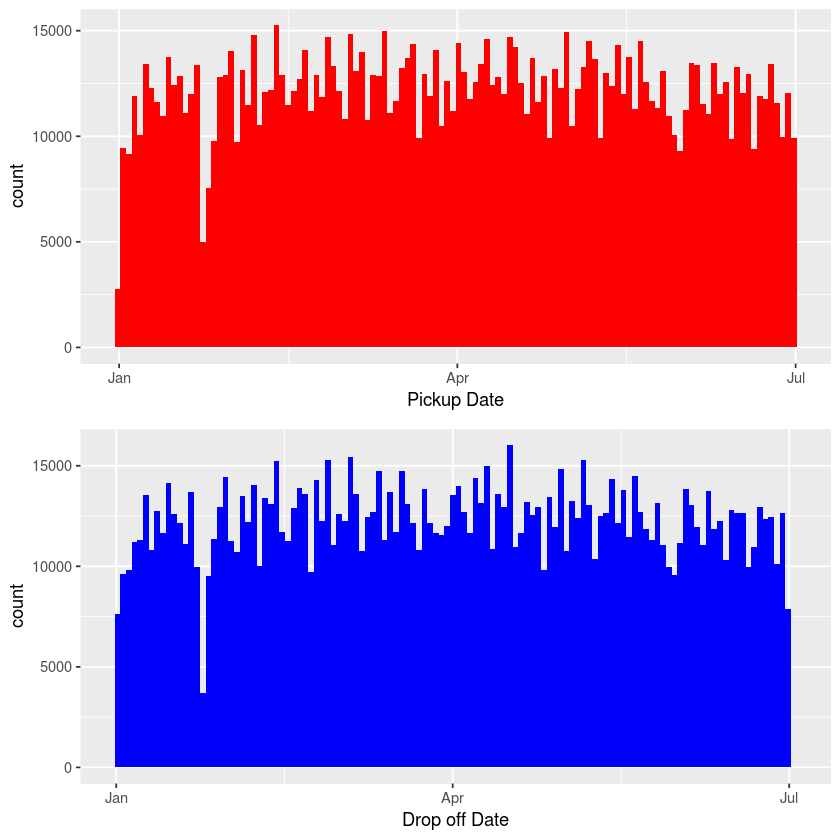

In [110]:
p1<-train%>%
    ggplot(aes(pickup_datetime))+
    geom_histogram(fill='red',bins=120)+
    labs(x='Pickup Date')+
    scale_shape_manual(values=c(12,2))
p2<-train%>% 
    ggplot(aes(dropoff_datetime))+
    geom_histogram(fill='blue',bins=120)+
    labs(x='Drop off Date')
multiplot(p1,p2)

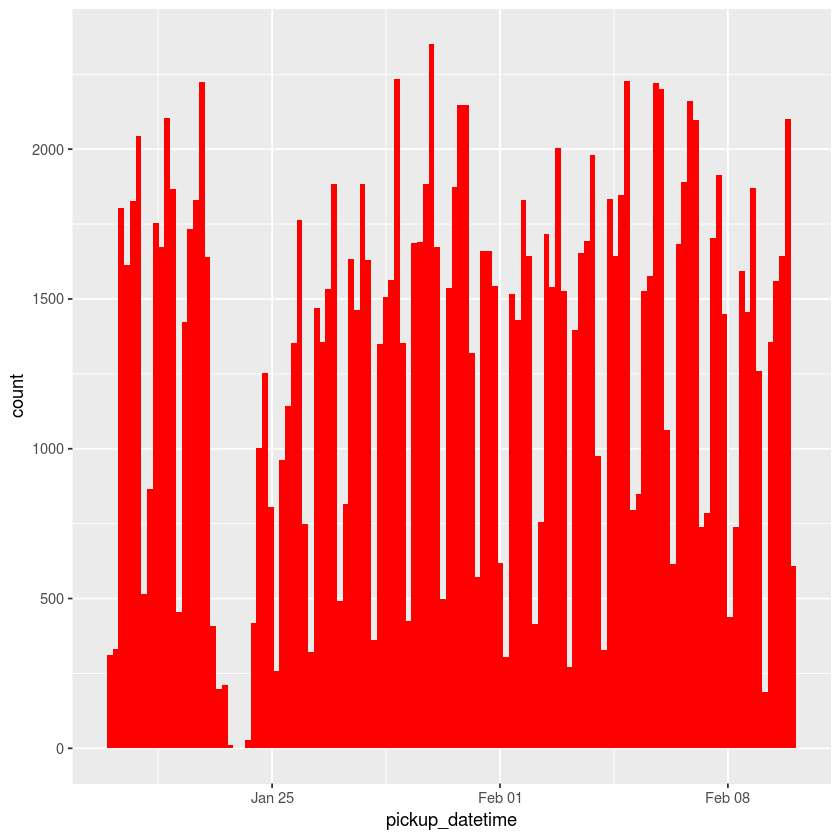

In [114]:
train %>%
  filter(pickup_datetime > ymd("2016-01-20") & pickup_datetime < ymd("2016-02-10")) %>%
  ggplot(aes(pickup_datetime)) +
  geom_histogram(fill = "red", bins = 120)

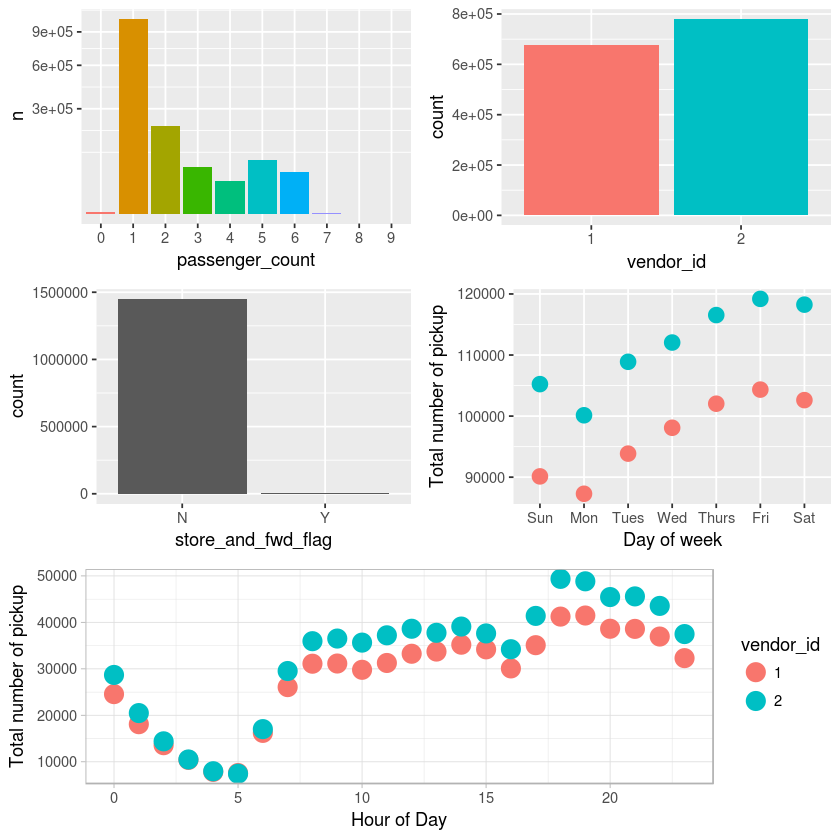

In [5]:
p1 <- train%>%
    group_by(passenger_count)%>%
    count()%>%
    ggplot(aes(passenger_count,n,fill=passenger_count))+
    geom_col()+
    scale_y_sqrt()+
    theme(legend.position='none')

p2 <- train%>%
    ggplot(aes(vendor_id,fill=vendor_id))+
    geom_bar()+
    theme(legend.position='none')

p3<- train%>%
    ggplot(aes(store_and_fwd_flag))+
    geom_bar()+
    theme(legend.position='none')

p4<- train%>%
    mutate(wday=wday(pickup_datetime,label=TRUE))%>%
    group_by(wday,vendor_id)%>%
    count()%>%
    ggplot(aes(wday,n,color=vendor_id))+
    geom_point(size=4)+
    labs(x='Day of week',y='Total number of pickup')+
    theme(legend.position='none')

p5 <- train%>%
    mutate(hpick=hour(pickup_datetime))%>%
    group_by(hpick,vendor_id)%>%
    count()%>%
    ggplot(aes(hpick,n,color=vendor_id))+
    geom_point(size=5)+
    labs(x='Hour of Day',y='Total number of pickup')+
    theme_light()

multiplot(p1,p2,p3,p4,p5,layout=matrix(c(1,2,3,4,5,5),3,2,byrow = TRUE))

In [135]:
train %>% 
    group_by(passenger_count)%>%
    count()

passenger_count,n
0,60
1,1033540
2,210318
3,59896
4,28404
5,78088
6,48333
7,3
8,1
9,1


In [139]:
train%>%
    group_by(store_and_fwd_flag)%>%
    count()

store_and_fwd_flag,n
N,1450599
Y,8045


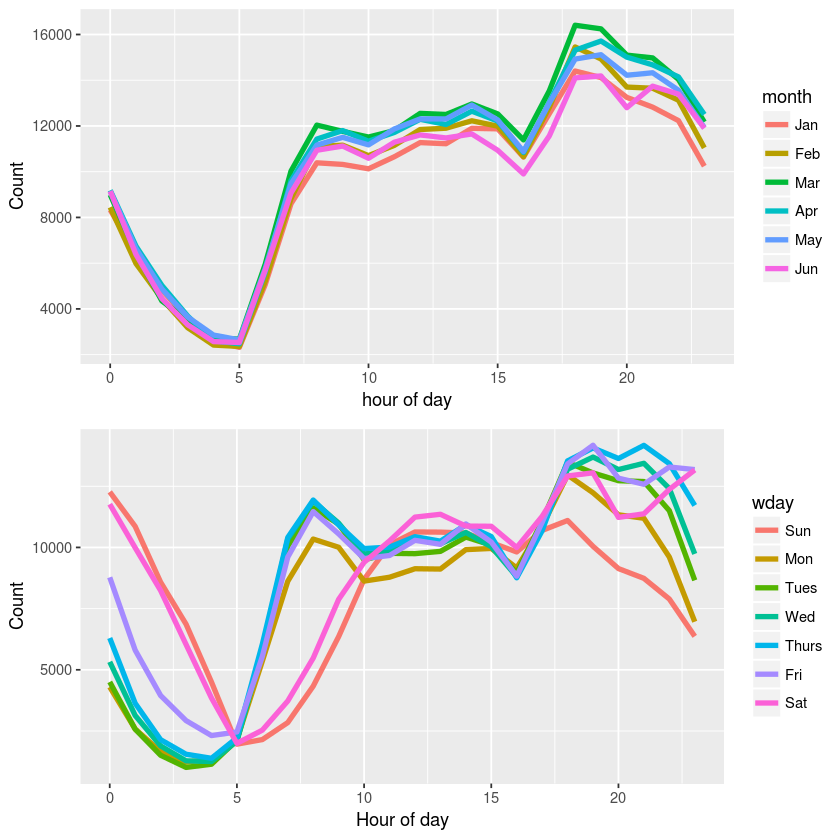

In [159]:
p1<- train%>%
    mutate(hpick = hour(pickup_datetime),
           month = factor(month(pickup_datetime,label=TRUE)))%>%
    group_by(hpick,month)%>%
    count()%>%
    ggplot(aes(hpick,n,color=month))+
    geom_line(size=1.5)+
    labs(x="hour of day",y='Count')

p2 <- train%>%
    mutate(hpick=hour(pickup_datetime),
           wday= wday(pickup_datetime,label=TRUE))%>%
    group_by(hpick,wday)%>%
    count()%>%
    ggplot(aes(hpick,n,color=wday))+
    geom_line(size=1.5)+
    labs(x='Hour of day',y='Count')
multiplot(p1,p2)

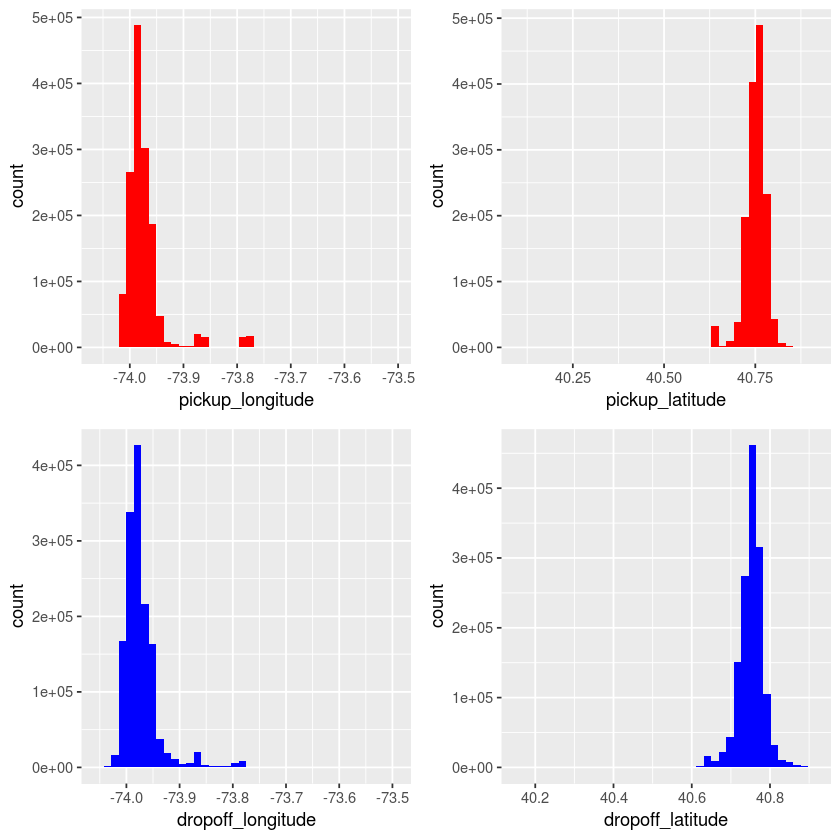

In [15]:
p1<-train%>%
    filter(pickup_longitude> -74.05 &  pickup_longitude < -73.5)%>%
    ggplot(aes(pickup_longitude))+
    geom_histogram(fill='red',bins=40)
p2 <-train%>%
    filter(dropoff_longitude > -74.05 & dropoff_longitude < -73.5)%>%
    ggplot(aes(dropoff_longitude))+
    geom_histogram(fill='blue',bins=40)
p3 <- train%>%
    filter(pickup_latitude > 40.06 & pickup_latitude < 40.9)%>%
    ggplot(aes(pickup_latitude))+
    geom_histogram(fill='red',bins=40)
p4<- train%>%
    filter(dropoff_latitude > 40.06 & dropoff_latitude < 40.9)%>%
    ggplot(aes(dropoff_latitude))+
    geom_histogram(fill='blue',bins=40)

multiplot(p1,p2,p3,p4,layout = matrix(1:4,2,2,byrow = FALSE))

In [17]:
train%>%
    arrange(pickup_latitude)%>%
    select(pickup_latitude,pickup_longitude)%>%
    head(5)

pickup_latitude,pickup_longitude
34.35970,-65.84839
34.71223,-75.35433
35.08153,-71.79990
35.31031,-72.07433
36.02930,-77.44075


In [19]:
train%>%
    arrange(desc(pickup_latitude))%>%
    select(pickup_latitude,pickup_longitude)%>%
    head(5)

pickup_latitude,pickup_longitude
51.88108,-72.80967
44.37194,-66.97216
43.91176,-71.88165
43.48689,-74.19514
43.13965,-72.59102


# Bivaraite analysis

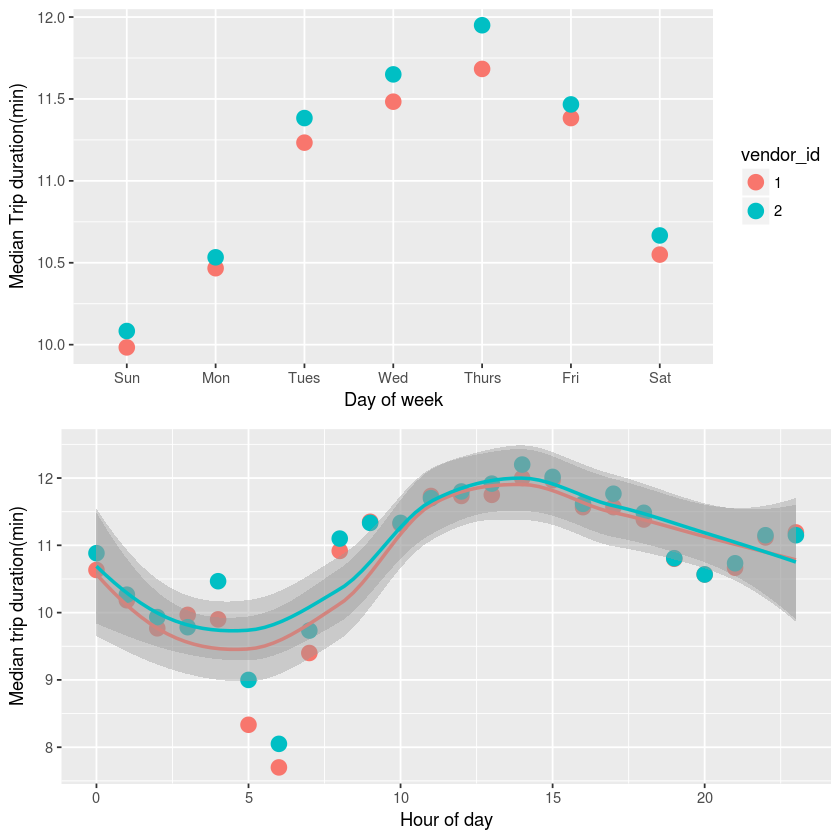

In [29]:
p1 <- train%>%
    mutate(wday=wday(pickup_datetime,label=TRUE))%>%
    group_by(wday,vendor_id)%>%
    summarise(median_trip = median(trip_duration)/60)%>%
    ggplot(aes(wday,median_trip,color=vendor_id))+
    geom_point(size=4)+
    labs(x='Day of week',y='Median Trip duration(min)')
p2<- train%>%
    mutate(hpick=hour(pickup_datetime))%>%
    group_by(hpick,vendor_id)%>%
    summarise(median_trip=median(trip_duration)/60)%>%
    ggplot(aes(hpick,median_trip,color=vendor_id))+
    geom_point(size=4)+
    geom_smooth(method = 'loess')+
    theme(legend.position = "none") +
    labs(x='Hour of day',y='Median trip duration(min)')
multiplot(p1,p2)

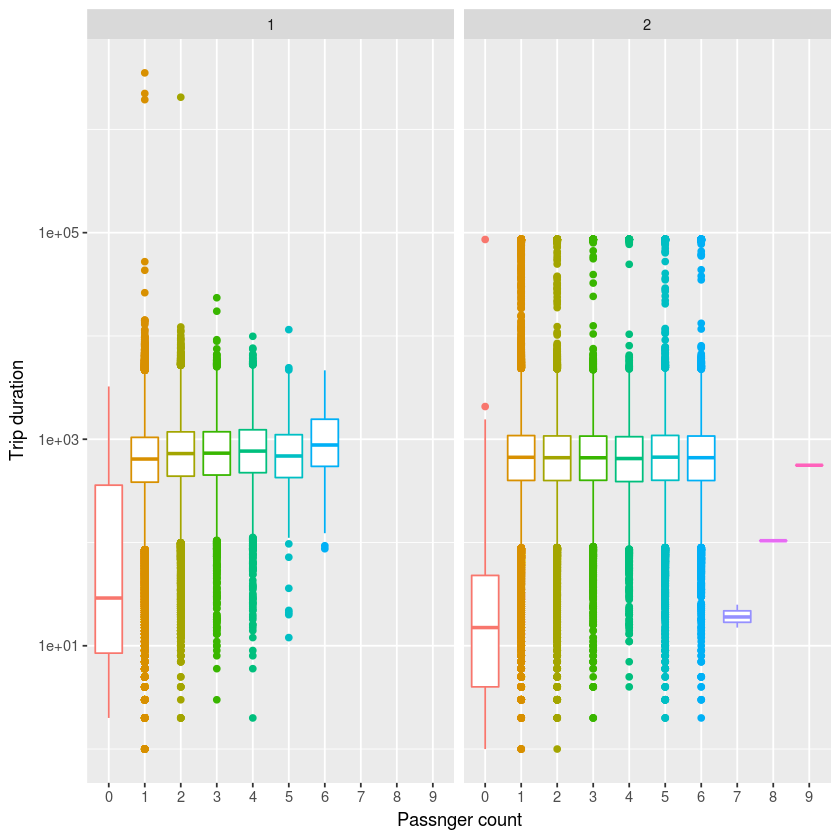

In [26]:
train%>%
    ggplot(aes(passenger_count,trip_duration,color=passenger_count))+
    geom_boxplot()+
    scale_y_log10()+
    facet_wrap(~vendor_id)+
    theme(legend.position = "none") +
    labs(x='Passnger count',y='Trip duration')

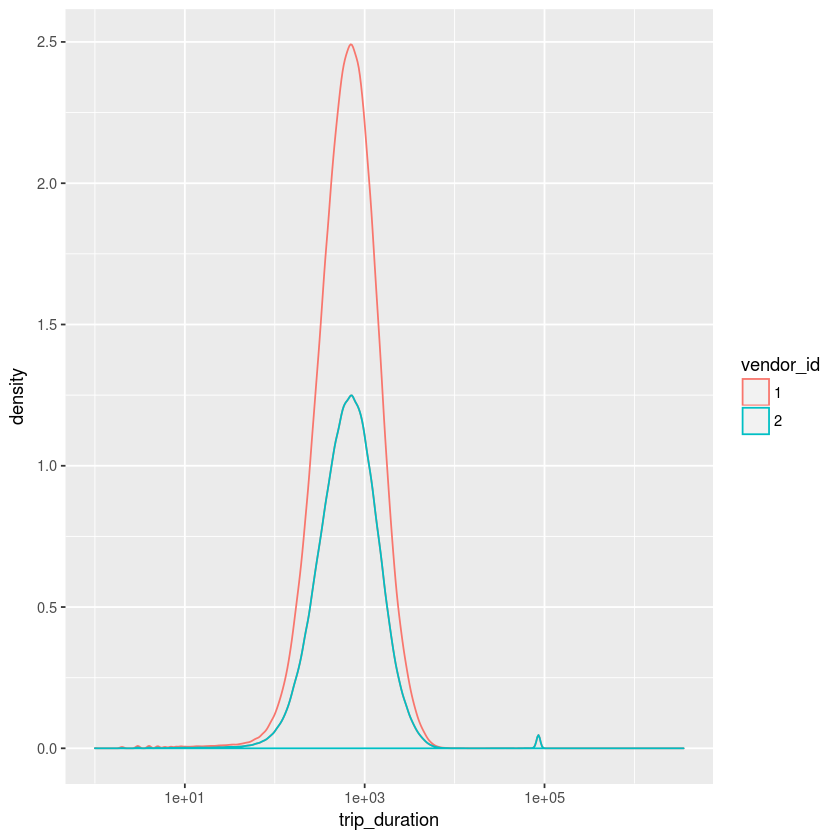

In [32]:
train%>%
    ggplot(aes(trip_duration,color=vendor_id))+
    geom_density(position='stack')+
    scale_x_log10()

In [34]:
train%>%
    group_by(vendor_id)%>%
    summarise(mean=mean(trip_duration),
            median=median(trip_duration))

vendor_id,mean,median
1,845.4382,658
2,1058.6432,666


In [40]:
train%>%
    group_by(vendor_id,store_and_fwd_flag)%>%
    count()
    

vendor_id,store_and_fwd_flag,n
1,N,670297
1,Y,8045
2,N,780302


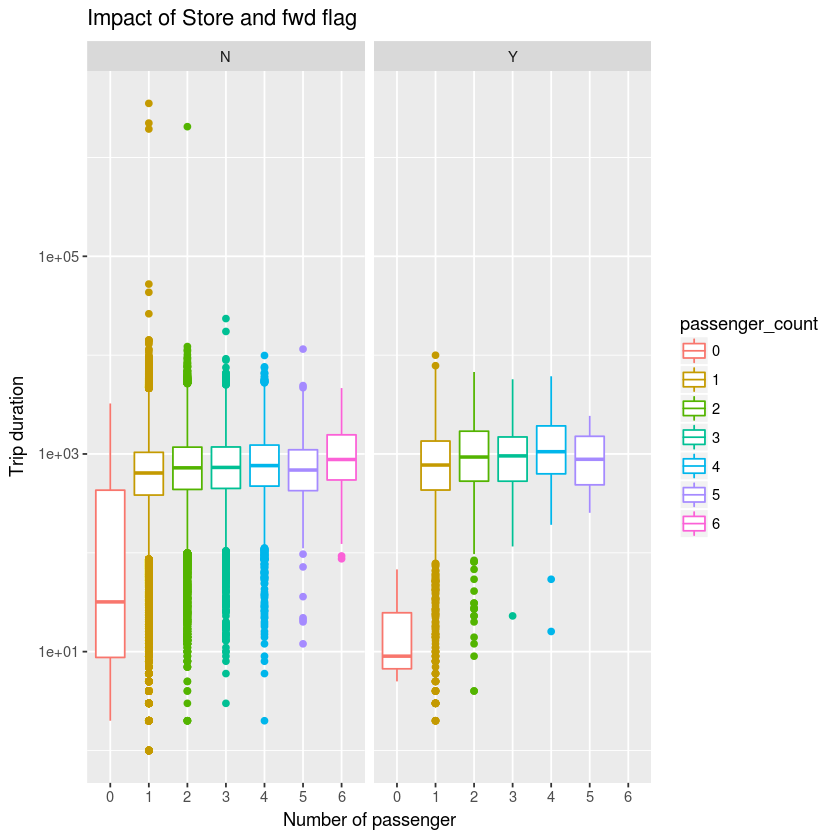

In [48]:
train%>%
    filter(vendor_id==1)%>%
    ggplot(aes(passenger_count,trip_duration,color=passenger_count))+
    geom_boxplot()+
    scale_y_log10()+
    facet_wrap(~store_and_fwd_flag)+
    labs(x='Number of passenger',y='Trip duration')+
    ggtitle('Impact of Store and fwd flag')

# Feature engineering

In [104]:
jfk_coord<-c(lon = -73.778889, lat = 40.639722)
la_guadrid_coord<- c(lon = -73.872611, lat = 40.77725)

pick_coord<- train%>%
    select(pickup_longitude,pickup_latitude)
drop_coord <- train%>%
    select(dropoff_longitude,dropoff_latitude)
train$dist <- distCosine(pick_coord,drop_coord)
train$bearing <- bearing(pick_coord,drop_coord)

train$jfk_dist_pick <- distCosine(pick_coord,jfk_coord)
train$jfk_dist_drop <- distCosine(drop_coord,jfk_coord)
train$lg_dist_pick <- distCosine(pick_coord,la_guadrid_coord)
train$lg_dist_drop <- distCosine(drop_coord,la_guadrid_coord)

train <- train %>%
    mutate(
    speed = dist/trip_duration*3.6,
    date =date(pickup_datetime),
    month = month(pickup_datetime,label=TRUE),
    wday = wday(pickup_datetime,label=TRUE),
    wday = fct_relevel(wday,c("Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun")),
    hour = hour(pickup_datetime),
    work = (hour %in%seq(8,18)) & (wday %in% c("Mon","Tues","Wed","Thurs","Fri")),
    jfk_trip = (jfk_dist_pick< 2e3)|(jfk_dist_drop < 2e3),
    lg_trip = (lg_dist_pick<2e3)|(lg_dist_drop < 2e3),
    blizzard = !( (date <ymd('2016-01-22')|(date >ymd('2016-01-29'))) )
    )


Warning message:
“Transformation introduced infinite values in continuous x-axis”

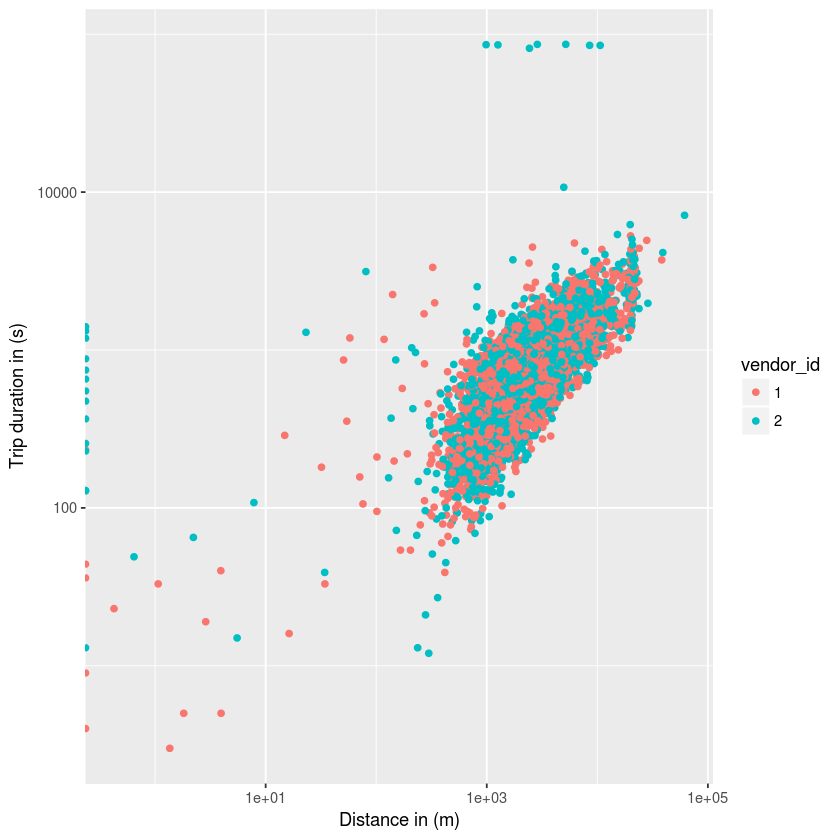

In [56]:
set.seed(4321)
train%>%
    sample_n(5e3)%>%
    ggplot(aes(dist,trip_duration,color=vendor_id))+
    geom_point()+
    scale_x_log10()+
    scale_y_log10()+
    labs(x='Distance in (m)',y='Trip duration in (s)')

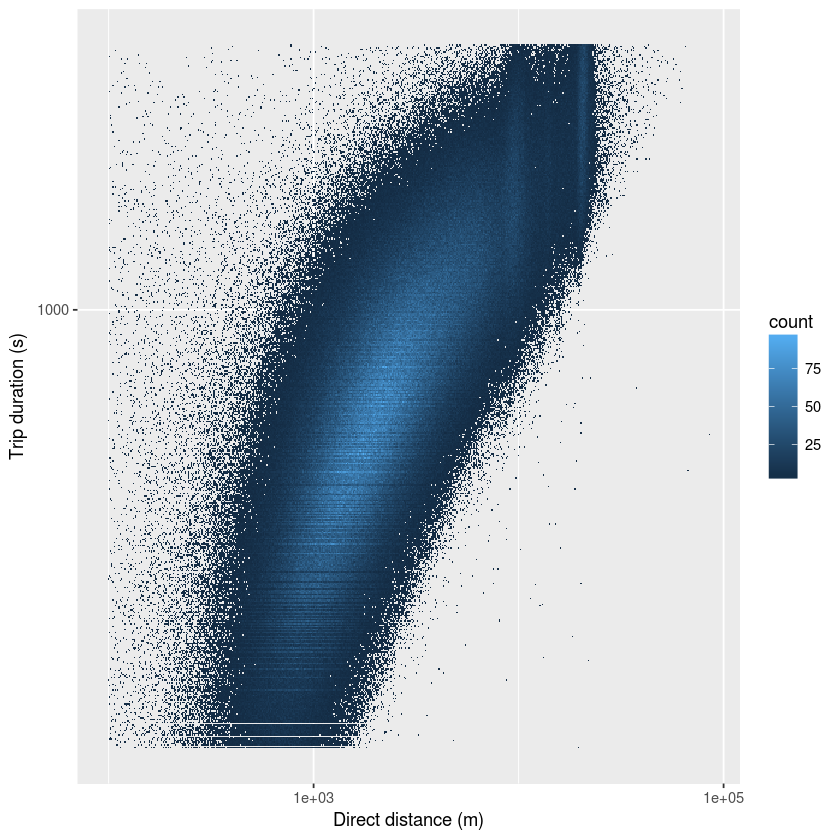

In [58]:
train%>%
    filter(trip_duration <3600 & trip_duration >120)%>%
    filter(dist >100 & dist < 100e3)%>%
    ggplot(aes(dist,trip_duration))+
    geom_bin2d(bins=c(500,500))+
    scale_x_log10()+
    scale_y_log10()+
    labs(x='Direct distance (m)',y='Trip duration (s)')


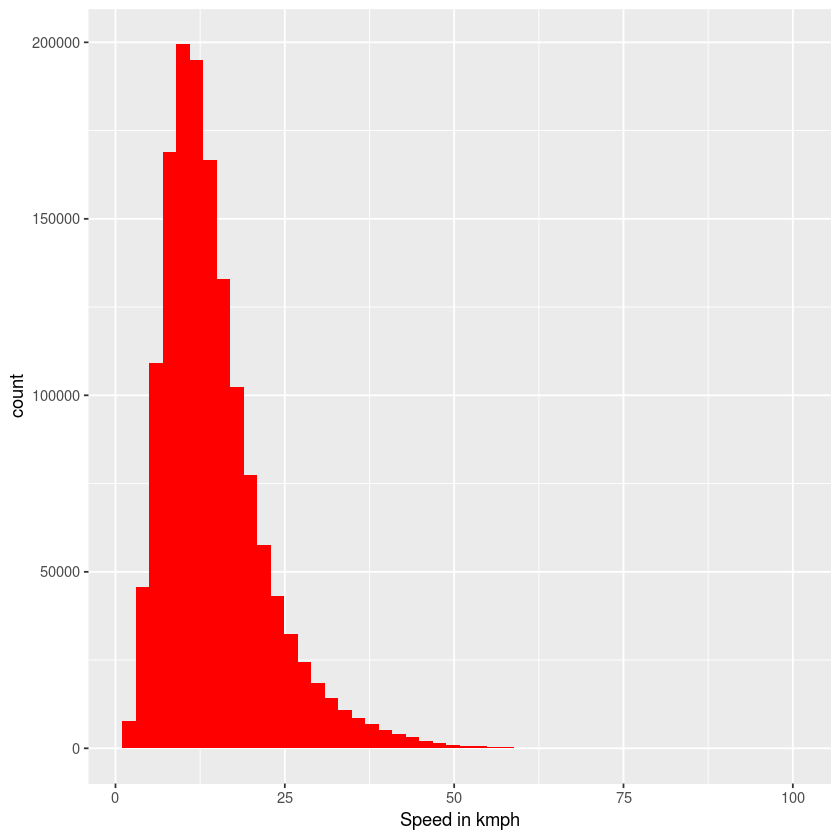

In [64]:
train%>%
    filter(speed>2 & speed< 1e2)%>%
    ggplot(aes(speed))+
    geom_histogram(bins = 50,fill='red')+
    labs(x='Speed in kmph')

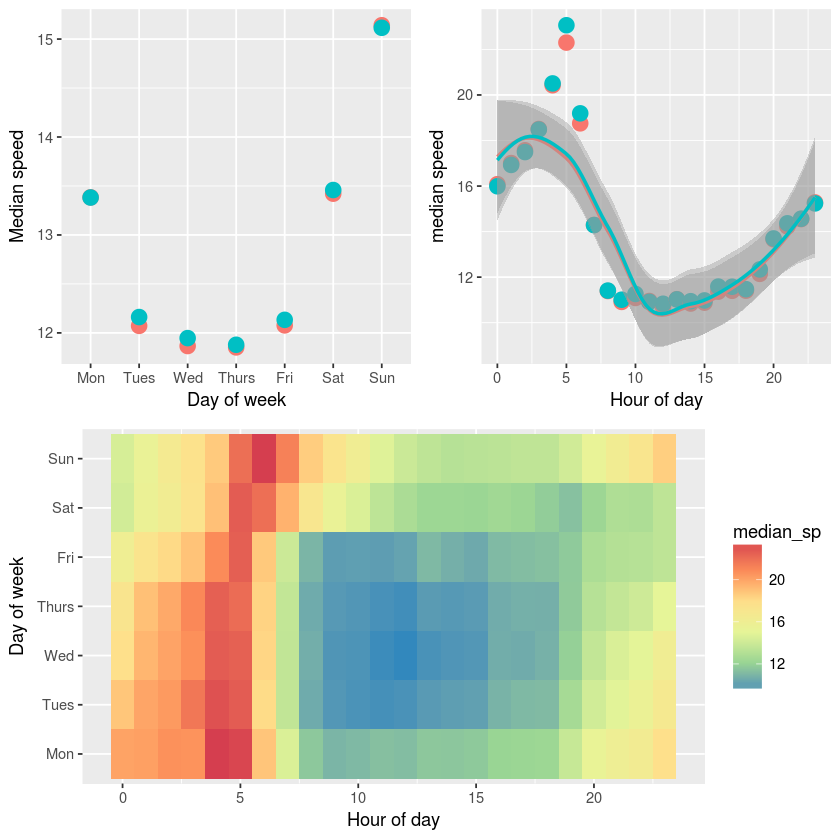

In [77]:
p1<-train%>%
    group_by(wday,vendor_id)%>%
    summarise(median_sp = median(speed))%>%
    ggplot(aes(wday,median_sp,color=vendor_id))+
    geom_point(size=4)+
    theme(legend.position='none')+
    labs(y='Median speed',x='Day of week')
p2 <- train%>%
    group_by(hour,vendor_id)%>%
    summarise(median_sp = median(speed))%>%
    ggplot(aes(hour,median_sp,color=vendor_id))+
    geom_point(size=4)+
    theme(legend.position='none')+
    geom_smooth(method='loess')+
    
    labs(y='median speed',x='Hour of day')
p3 <- train%>%
    group_by(wday,hour)%>%
    summarise(median_sp= median(speed))%>%
    ggplot(aes(hour,wday,fill=median_sp))+
    geom_tile()+
    labs(x='Hour of day',y='Day of week')+
    scale_fill_distiller(palette = "Spectral")

multiplot(p1,p2,p3,layout=matrix(c(1,2,3,3),2,2,byrow=TRUE))

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 5897 rows containing non-finite values (stat_bin2d).”

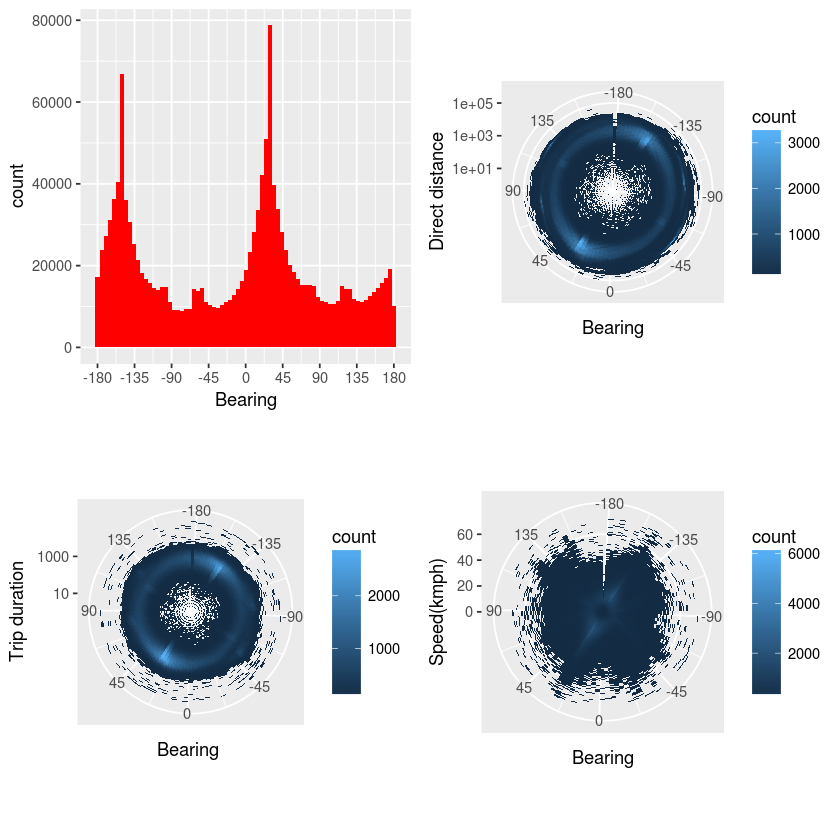

In [82]:
#Bearing Direction
p1 <- train%>%
    filter(dist<1e5)%>%
    ggplot(aes(bearing))+
    geom_histogram(fill='red',bins=75)+
    scale_x_continuous(breaks=seq(-180,180,by=45))+
    labs(x='Bearing')
p2 <- train%>%
    filter(dist<1e5)%>%
    ggplot(aes(bearing,dist))+
    geom_bin2d(bins=c(100,100))+
    labs(x='Bearing',y='Direct distance')+
    scale_y_log10()+
    coord_polar()+
    scale_x_continuous(breaks=seq(-180,180,by=45))

p3 <- train%>%
    filter(trip_duration<3600*22)%>%
    filter(dist<1e5)%>%
    ggplot(aes(bearing,trip_duration))+
    geom_bin2d(bins=c(100,100))+
    scale_y_log10()+
    labs(x='Bearing ',y='Trip duration')+
    coord_polar()+
    scale_x_continuous(breaks=seq(-180,180,by=45))

p4 <- train%>%
    filter(speed<75 & dist<1e5)%>%
    ggplot(aes(bearing,speed))+
    geom_bin2d(bins=c(100,100))+
    labs(x='Bearing',y='Speed(kmph)')+
    coord_polar()+
    scale_x_continuous(breaks=seq(-180,180,by=45))


multiplot(p1,p2,p3,p4,layout=matrix(c(1:4),2,2,byrow=TRUE))

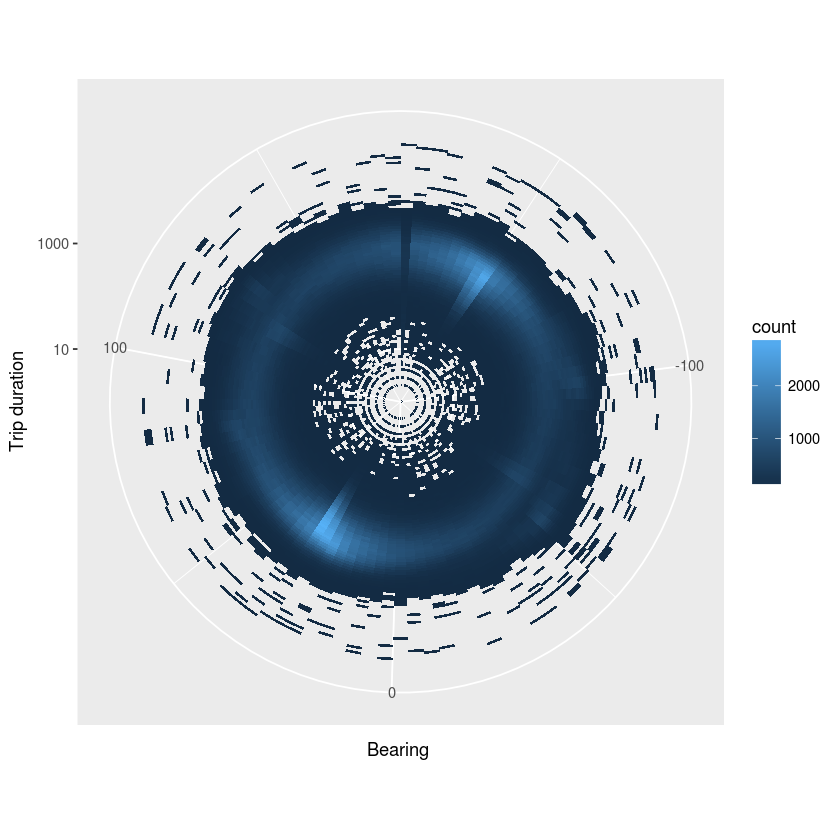

In [86]:
train%>%
    filter(trip_duration<3600*22)%>%
    filter(dist<1e5)%>%
    ggplot(aes(bearing,trip_duration))+
    geom_bin2d(bins=c(100,100))+
    scale_y_log10()+
    labs(x='Bearing ',y='Trip duration')+
    coord_polar()


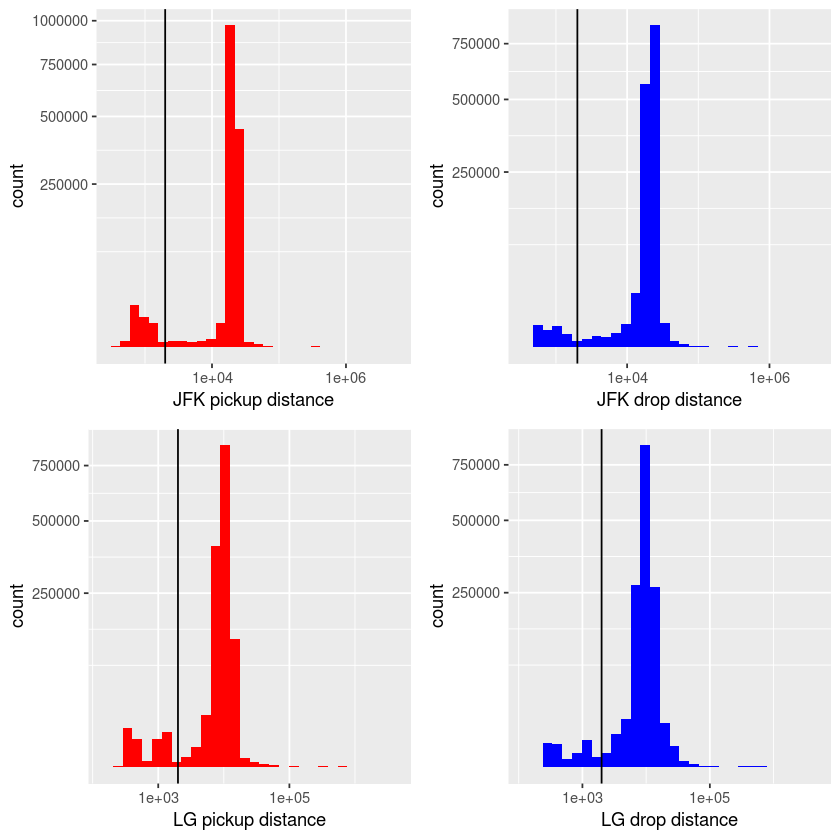

In [92]:
p1 <- train%>%
    ggplot(aes(jfk_dist_pick))+
    geom_histogram(bins=30,fill='red')+
    scale_x_log10()+
    scale_y_sqrt()+
    labs(x='JFK pickup distance')+
    theme(legend.position='none')+
    geom_vline(xintercept = 2e3)

p2 <- train%>%
    ggplot(aes(jfk_dist_drop))+
    geom_histogram(bins=30,fill='blue')+
    scale_x_log10()+
    scale_y_sqrt()+
    labs(x='JFK drop distance')+
    theme(legend.position='none')+
    geom_vline(xintercept=2e3)

p3 <- train%>%
    ggplot(aes(lg_dist_pick))+
    geom_histogram(bins=30,fill='red')+
    scale_x_log10()+
    scale_y_sqrt()+
    labs(x='LG pickup distance')+
    theme(legend.position='none')+
    geom_vline(xintercept = 2e3)

p4 <- train %>%
    ggplot(aes(lg_dist_drop))+
    geom_histogram(bins=30,fill='blue')+
    scale_x_log10()+
    scale_y_sqrt()+
    labs(x='LG drop distance')+
    theme(legend.position='none')+
    geom_vline(xintercept = 2e3)

multiplot(p1,p2,p3,p4,layout=matrix(c(1:4),2,2,byrow=TRUE))

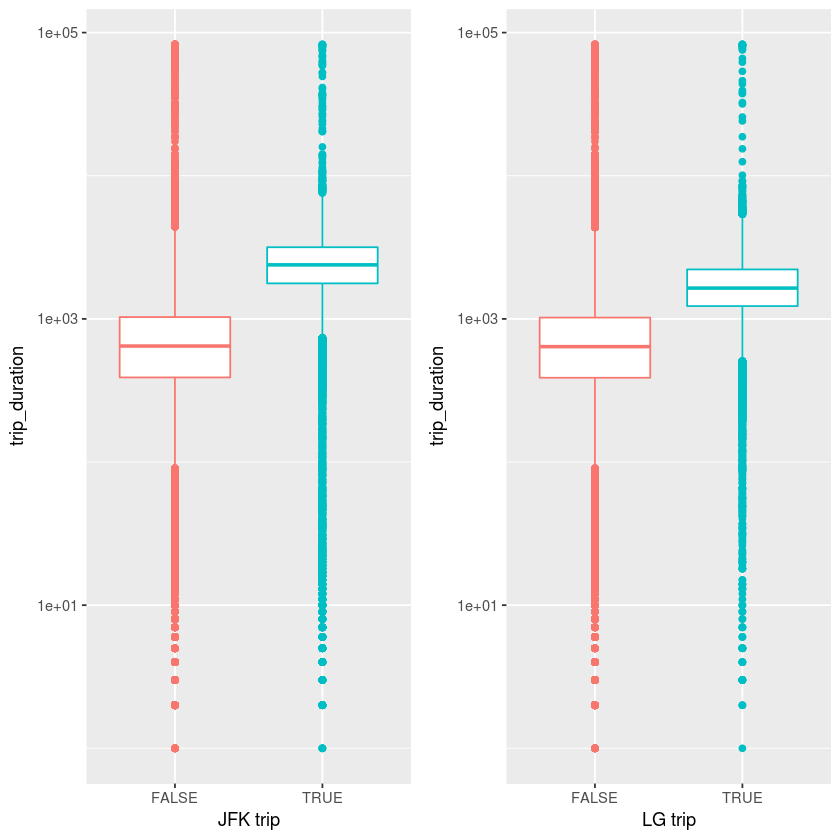

In [107]:
p1 <- train%>%
    filter(trip_duration < 23*3600)%>%
    ggplot(aes(jfk_trip,trip_duration,color=jfk_trip))+
    geom_boxplot()+
    labs(x='JFK trip')+
    theme(legend.position='none')+
    scale_y_log10()
p2 <- train%>% 
    filter(trip_duration <23*3600)%>%
    ggplot(aes(lg_trip,trip_duration,color=lg_trip))+
    geom_boxplot()+
    labs(x='LG trip')+
    theme(legend.position='none')+
    scale_y_log10()

multiplot(p1,p2,layout=matrix(1:2,1,2))    

# data cleaning

In [124]:
day_plus_trips <- train%>%
    filter(trip_duration <24*3600)

day_plus_trips%>%
    select(pickup_datetime,dropoff_datetime,speed)%>% head()

pickup_datetime,dropoff_datetime,speed
2016-03-14 17:24:55,2016-03-14 17:32:30,11.869710
2016-06-12 00:43:35,2016-06-12 00:54:38,9.814641
2016-01-19 11:35:24,2016-01-19 12:10:48,10.834324
2016-04-06 19:32:31,2016-04-06 19:39:40,12.479686
2016-03-26 13:30:55,2016-03-26 13:38:10,9.847613
2016-01-30 22:01:40,2016-01-30 22:09:03,8.940462


In [125]:
 ny_map <- as.data.frame(map_data("state", region = "new york:manhattan"))

tpick <- day_plus_trips %>%
  select(lon = pickup_longitude, lat = pickup_latitude)
tdrop <- day_plus_trips %>%
  select(lon = dropoff_longitude, lat = dropoff_latitude)

p1 <- ggplot() +
  geom_polygon(data=ny_map, aes(x=long, y=lat), fill = "grey60") +
  geom_point(data=tpick,aes(x=lon,y=lat),size=1,color='red',alpha=1) +
  geom_point(data=tdrop,aes(x=lon,y=lat),size=1,color='blue',alpha=1)

for (i in seq(1,nrow(tpick))){
  inter <- as.data.frame(gcIntermediate(tpick[i,],  tdrop[i,], n=30, addStartEnd=TRUE))
  p1 <- p1 +  geom_line(data=inter,aes(x=lon,y=lat),color='blue',alpha=.75)
}

p1 + ggtitle("Longer than a day trips in relation to Manhattan")

In [119]:
day_trips <- train %>%
  filter(trip_duration < 24*3600 & trip_duration > 22*3600)

day_trips %>% 
  arrange(desc(dist)) %>%
  select(dist, pickup_datetime, dropoff_datetime, speed) %>%
  head(5)

dist,pickup_datetime,dropoff_datetime,speed
60666.07,2016-06-04 13:54:29,2016-06-05 13:40:30,2.5525397
42401.12,2016-01-28 21:43:02,2016-01-29 21:33:30,1.7784875
28115.94,2016-03-14 22:46:05,2016-03-15 22:24:27,1.1893653
22807.88,2016-06-18 17:41:47,2016-06-19 16:30:41,0.9996878
22758.58,2016-06-01 19:52:42,2016-06-02 19:35:09,0.9599740


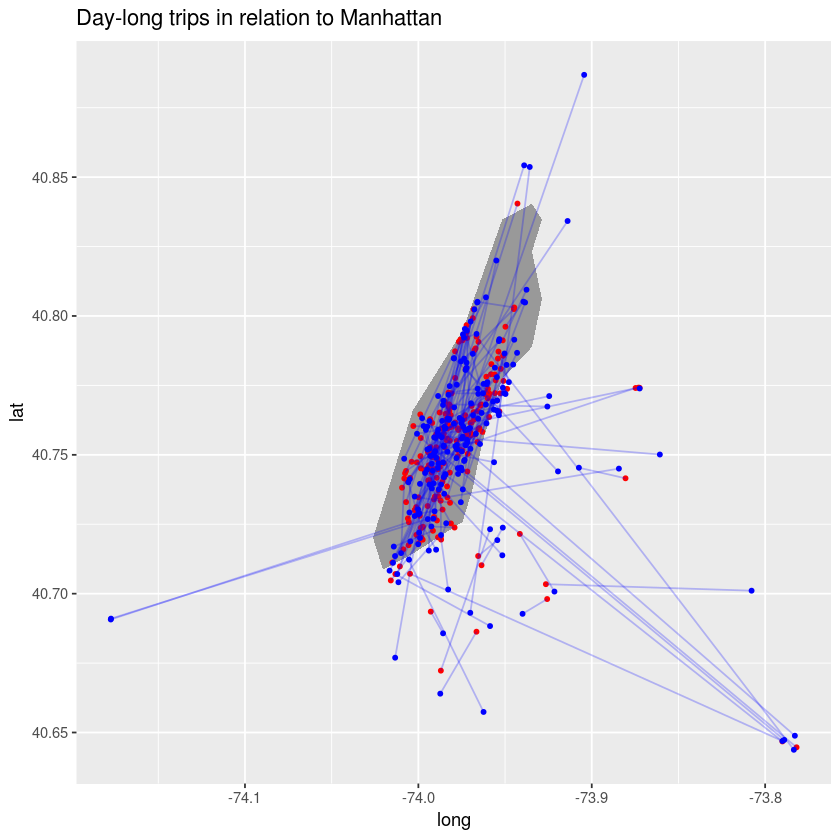

In [121]:
ny_map <- as.data.frame(map_data("state", region = "new york:manhattan"))

set.seed(2017)
day_trips <- day_trips %>%
  sample_n(200)

tpick <- day_trips %>%
  select(lon = pickup_longitude, lat = pickup_latitude)
tdrop <- day_trips %>%
  select(lon = dropoff_longitude, lat = dropoff_latitude)

p1 <- ggplot() +
  geom_polygon(data=ny_map, aes(x=long, y=lat), fill = "grey60") +
  geom_point(data=tpick,aes(x=lon,y=lat),size=1,color='red',alpha=1) +
  geom_point(data=tdrop,aes(x=lon,y=lat),size=1,color='blue',alpha=1)

for (i in seq(1,nrow(tpick))){
  inter <- as.data.frame(gcIntermediate(tpick[i,],  tdrop[i,], n=30, addStartEnd=TRUE))
  p1 <- p1 +  geom_line(data=inter,aes(x=lon,y=lat),color='blue',alpha=.25)
}

p1 + ggtitle("Day-long trips in relation to Manhattan")

In [126]:
install.packages("tidyverse")

also installing the dependencies ‘cellranger’, ‘broom’, ‘haven’, ‘modelr’, ‘purrr’, ‘readxl’

Warning message in install.packages("tidyverse"):
“installation of package ‘haven’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘purrr’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘modelr’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘readxl’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
